In [9]:
# Global settings for nicer slides

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=3)

# Slideshow
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': 1440, 'height': 768, 'scroll': True, 'theme': 'simple'})

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

# 1. Preliminaries
## numpy, pandas, matplotlib 

## NumPy
A library for matrix computation
* Main object: multidimensional array (ndarray)

In [10]:
import numpy as np

# This is an array of length 3 and rank 2
np.array([[1, 0, 3], [0, 1, 2]])

array([[1, 0, 3],
       [0, 1, 2]])

Useful properties of ndarrays:
* ndarray.ndim: number of dimensions (axes), also called the *rank*
* ndarray.shape: dimensions of the array - a matrix with n rows and m columns has shape (n,m)
* ndarray.size: the total number of elements of the array (n\*m)
* ndarray.dtype: type of the elements in the array
* ndarray.itemsize: the size in bytes of each element of the array.

In [11]:
# This prints all outputs, so that we don't have to explictly call the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
my_array = np.array([[1, 0, 3], [0, 1, 2]])
my_array.ndim
my_array.shape
my_array.size
my_array.dtype
my_array.itemsize

2

(2, 3)

6

dtype('int64')

8

### Array Creation
There are several ways to create arrays.

In [13]:
# Convert normal Python array to 1-dimensional numpy array
np.array((1, 2, 53))

array([ 1,  2, 53])

In [14]:
# Convert sequences of sequences of sequences ... to n-dim array
np.array([(1.5, 2, 3), (4, 5, 6)])

array([[ 1.5,  2. ,  3. ],
       [ 4. ,  5. ,  6. ]])

In [15]:
# Define element type at creation time
np.array([[1, 2], [3, 4]], dtype=complex)

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

In [94]:
# Create ndarrays of placeholders (cheaper than extending arrays)
# Default type is float64. empty() may produce random data
np.ones(3) 
np.zeros(2) 
np.empty([2, 2])
np.random.random((2,3))

array([ 1.,  1.,  1.])

array([ 0.,  0.])

array([[  4.941e-324,   1.482e-323],
       [  9.881e-324,   1.976e-323]])

array([[ 0.907,  0.423,  0.366],
       [ 0.964,  0.523,  0.861]])

In [17]:
# Create sequences of numbers
np.linspace(0, 1, num=4)
np.arange(0, 1, step=0.3)
np.arange(12).reshape(3,4)

array([ 0.   ,  0.333,  0.667,  1.   ])

array([ 0. ,  0.3,  0.6,  0.9])

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

## Basic Operations
Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result. Some operations, such as += and *=, act in place to modify an existing array rather than create a new one.

In [18]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
a, b
a-b
b**2
a > 32
a += 1
a

(array([20, 30, 40, 50]), array([0, 1, 2, 3]))

array([20, 29, 38, 47])

array([0, 1, 4, 9])

array([False, False,  True,  True], dtype=bool)

array([21, 31, 41, 51])

The product operator * operates elementwise. The matrix product can be performed using dot() 

In [19]:
A = np.array([[1,1], [0,1]])
B = np.array([[2,0], [3,4]])
A * B
np.dot(A, B)

array([[2, 0],
       [0, 4]])

array([[5, 4],
       [3, 4]])

Upcasting: Operations with arrays of different types choose the more general/precise one.

In [20]:
a = np.ones(3, dtype=np.int)
b = np.linspace(0, np.pi, 3)
a.dtype, b.dtype, (a + b).dtype

(dtype('int64'), dtype('float64'), dtype('float64'))

Many unary operations (max,min,sum,...) are methods of the ndarray class.

In [21]:
a = np.random.random((2,3))
a
a.sum(), a.min(), a.max()

array([[ 0.152,  0.41 ,  0.127],
       [ 0.927,  0.781,  0.965]])

(3.3611836332663678, 0.12655363145998644, 0.96510798861750646)

By specifying the axis parameter you can apply an operation along a specified axis of an array

In [22]:
b = np.arange(12).reshape(3,4)
b
b.sum(axis=0) 
b.sum(axis=1) 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([12, 15, 18, 21])

array([ 6, 22, 38])

## Universal Functions

NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called "universal functions" (ufunc). Within NumPy, these functions operate elementwise on an array, producing an array as output. 

In [23]:
np.sqrt(np.arange(0, 10))

array([ 0.   ,  1.   ,  1.414,  1.732,  2.   ,  2.236,  2.449,  2.646,
        2.828,  3.   ])

## Indexing and Slicing

One-dimensional arrays can be indexed, sliced and iterated over, much like lists and other Python sequences. Format [start:stop:step]

In [97]:
a = np.arange(10)**2
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [98]:
a[2]

4

In [99]:
a[3:100:2]

array([ 9, 25, 49, 81])

In [27]:
a[::-1]

array([81, 64, 49, 36, 25, 16,  9,  4,  1,  0])

In [28]:
a[::2]

array([ 0,  4, 16, 36, 64])

Numpy arrays can have one index per axis. Indices are given as [x,y,z]. 

In [29]:
b = np.arange(16).reshape(4,4)
b
b[2,3]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

11

In [30]:
# Return the second column
b[0:5,1]              
b[ : ,1]

array([ 1,  5,  9, 13])

array([ 1,  5,  9, 13])

In [31]:
# Return all column in row 1:3
b[1:3, : ]                      

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [32]:
# Return the last row
b[-1]

array([12, 13, 14, 15])

Dots (...) represent as many colons (:) as needed
* x[1,2,...] = x[1,2,:,:,:]
* x[...,3] = x[:,:,:,:,3]
* x[4,...,5,:] = x[4,:,:,5,:]

## Iterating 
Iterating is done with respect to the first axis:

In [33]:
for row in b:
    print(row)

[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]
[12 13 14 15]


Operations on each element can be done by flattening the array:

In [34]:
for element in b.flat:
    print(element)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


## Shape Manipulation

In [35]:
a = np.floor(10*np.random.random((3,4)))
a
a.ravel() # flatten array
a.transpose()
a.reshape(2, -1) # reshape with -1 as wildcard

array([[ 2.,  3.,  1.,  3.],
       [ 9.,  5.,  8.,  9.],
       [ 5.,  0.,  5.,  3.]])

array([ 2.,  3.,  1.,  3.,  9.,  5.,  8.,  9.,  5.,  0.,  5.,  3.])

array([[ 2.,  9.,  5.],
       [ 3.,  5.,  0.],
       [ 1.,  8.,  5.],
       [ 3.,  9.,  3.]])

array([[ 2.,  3.,  1.,  3.,  9.,  5.],
       [ 8.,  9.,  5.,  0.,  5.,  3.]])

## Stacking together different arrays

Several arrays can be stacked together along different axes:

In [36]:
a = np.floor(10*np.random.random((2,2)))
b = np.floor(10*np.random.random((2,2)))
print(a)
print(b)

[[ 4.  8.]
 [ 1.  2.]]
[[ 7.  9.]
 [ 6.  0.]]


In [37]:
np.vstack((a, b))

array([[ 4.,  8.],
       [ 1.,  2.],
       [ 7.,  9.],
       [ 6.,  0.]])

In [38]:
np.hstack((a, b))

array([[ 4.,  8.,  7.,  9.],
       [ 1.,  2.,  6.,  0.]])

## Splitting one array into several smaller ones

In [39]:
a = np.floor(10*np.random.random((2,12)))
a

array([[ 8.,  2.,  5.,  7.,  2.,  9.,  7.,  1.,  0.,  5.,  0.,  3.],
       [ 1.,  6.,  5.,  0.,  0.,  1.,  5.,  0.,  9.,  5.,  0.,  0.]])

Split a into 3

In [40]:
np.hsplit(a, 3)

[array([[ 8.,  2.,  5.,  7.],
        [ 1.,  6.,  5.,  0.]]), array([[ 2.,  9.,  7.,  1.],
        [ 0.,  1.,  5.,  0.]]), array([[ 0.,  5.,  0.,  3.],
        [ 9.,  5.,  0.,  0.]])]

Split a after the third and the fourth column

In [41]:
np.hsplit(a, (3, 4))

[array([[ 8.,  2.,  5.],
        [ 1.,  6.,  5.]]), array([[ 7.],
        [ 0.]]), array([[ 2.,  9.,  7.,  1.,  0.,  5.,  0.,  3.],
        [ 0.,  1.,  5.,  0.,  9.,  5.,  0.,  0.]])]

## Copies and Views or how to shoot yourself in a foot

When operating and manipulating arrays, their data is sometimes copied into a new array and sometimes not. This is often a source of confusion for beginners. There are three cases:
### No Copy at All

In [42]:
a = np.arange(12)
b = a
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [43]:
b[0] = -100
b

array([-100,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11])

In [44]:
a

array([-100,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11])

### View or Shallow Copy

Different array objects can share the same data. The view method creates a new array object that looks at the same data. 

In [45]:
c = a.view()
c.resize((2, 6))
c

array([[-100,    1,    2,    3,    4,    5],
       [   6,    7,    8,    9,   10,   11]])

In [46]:
a

array([-100,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11])

In [47]:
a[0] = 123
c

array([[123,   1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

Slicing an array returns a view of it.

In [48]:
s = c[ : , 1:3]  
s[:] = 10
c

array([[123,  10,  10,   3,   4,   5],
       [  6,  10,  10,   9,  10,  11]])

### Deep Copy

The copy method makes a complete copy of the array and its data. 

In [49]:
d = a.copy()     
d[0] = -42
d

array([-42,  10,  10,   3,   4,   5,   6,  10,  10,   9,  10,  11])

In [50]:
a

array([123,  10,  10,   3,   4,   5,   6,  10,  10,   9,  10,  11])

## Fancy indexing and index tricks
In addition to indexing by integers and slices, arrays can be indexed by arrays of integers and booleans.
### Indexing with Arrays of Indices

In [51]:
a = np.arange(12)**2         
i = np.array([ 1,1,3,8,5 ])
a
a[i]

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

array([ 1,  1,  9, 64, 25])

A bidimensional array of indices. Note the shape.

In [52]:
j = np.array([[ 3, 4], [9, 7]])
a[j]

array([[ 9, 16],
       [81, 49]])

### Indexing with Boolean Arrays
With boolean indices we explicitly choose which items in the array we want and which ones we don't.

In [53]:
a = np.arange(12).reshape(3,4)
a
b = a > 4
b
a[b]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

array([ 5,  6,  7,  8,  9, 10, 11])

A second way of boolean indexing: for each dimension of the array we give a 1D boolean array selecting the slices we want. 

In [54]:
a = np.arange(12).reshape(3,4)
b1 = np.array([False,True,True])             # first dim selection
b2 = np.array([True,False,True,False])       # second dim selection

In [55]:
a
a[b1, :] # rows

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [56]:
a[:, b2] # columns

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [57]:
a[b1, b2] # both

array([ 4, 10])

# Further reading
* Numpy Tutorial: http://wiki.scipy.org/Tentative_NumPy_Tutorial
* Python for Data Analysis (O'Reilly)

## pandas
A data structure for easy data manipulation

### Creation
Creating a Series by passing a list of values, or a DataFrame by passing a dict.
You can also pass numpy arrays, csv files,... 

In [58]:
import pandas as pd
import numpy as np
pd.Series([1,3,5,np.nan,6,8])

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [59]:
dates = pd.date_range('20130101',periods=6)
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.487186,-0.518322,-0.317637,-0.942250
2013-01-02,0.182851,1.210652,-0.237843,0.710840
2013-01-03,0.232428,3.090262,0.341149,-0.081360
2013-01-04,1.176795,-0.337624,0.313336,0.081790
2013-01-05,0.889371,-0.548659,-0.627954,0.201877
2013-01-06,-1.484224,0.633469,-1.564567,0.893281


### Viewing data

In [60]:
df.head()
df.tail()

,A,B,C,D
2013-01-01,0.487186,-0.518322,-0.317637,-0.942250
2013-01-02,0.182851,1.210652,-0.237843,0.710840
2013-01-03,0.232428,3.090262,0.341149,-0.081360
2013-01-04,1.176795,-0.337624,0.313336,0.081790
2013-01-05,0.889371,-0.548659,-0.627954,0.201877


,A,B,C,D
2013-01-02,0.182851,1.210652,-0.237843,0.710840
2013-01-03,0.232428,3.090262,0.341149,-0.081360
2013-01-04,1.176795,-0.337624,0.313336,0.081790
2013-01-05,0.889371,-0.548659,-0.627954,0.201877
2013-01-06,-1.484224,0.633469,-1.564567,0.893281


In [62]:
# Underlying components
df.index
df.columns
df.values

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

Index(['A', 'B', 'C', 'D'], dtype='object')

array([[ 0.487, -0.518, -0.318, -0.942],
       [ 0.183,  1.211, -0.238,  0.711],
       [ 0.232,  3.09 ,  0.341, -0.081],
       [ 1.177, -0.338,  0.313,  0.082],
       [ 0.889, -0.549, -0.628,  0.202],
       [-1.484,  0.633, -1.565,  0.893]])

In [63]:
# Quick stats
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.247401,0.588297,-0.348919,0.144029
std,0.931269,1.415895,0.704805,0.651257
min,-1.484224,-0.548659,-1.564567,-0.942250
25%,0.195245,-0.473147,-0.550375,-0.040573
50%,0.359807,0.147923,-0.277740,0.141833
75%,0.788825,1.066357,0.175541,0.583599
max,1.176795,3.090262,0.341149,0.893281


In [64]:
# Transpose
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.487186,0.182851,0.232428,1.176795,0.889371,-1.484224
B,-0.518322,1.210652,3.090262,-0.337624,-0.548659,0.633469
C,-0.317637,-0.237843,0.341149,0.313336,-0.627954,-1.564567
D,-0.942250,0.710840,-0.081360,0.081790,0.201877,0.893281


In [66]:
# Sort by axis
df
df.sort_index(axis=1, ascending=False)

,A,B,C,D
2013-01-01,0.487186,-0.518322,-0.317637,-0.942250
2013-01-02,0.182851,1.210652,-0.237843,0.710840
2013-01-03,0.232428,3.090262,0.341149,-0.081360
2013-01-04,1.176795,-0.337624,0.313336,0.081790
2013-01-05,0.889371,-0.548659,-0.627954,0.201877
2013-01-06,-1.484224,0.633469,-1.564567,0.893281


,D,C,B,A
2013-01-01,-0.942250,-0.317637,-0.518322,0.487186
2013-01-02,0.710840,-0.237843,1.210652,0.182851
2013-01-03,-0.081360,0.341149,3.090262,0.232428
2013-01-04,0.081790,0.313336,-0.337624,1.176795
2013-01-05,0.201877,-0.627954,-0.548659,0.889371
2013-01-06,0.893281,-1.564567,0.633469,-1.484224


In [67]:
# Sort by values
df.sort(columns='B')

,A,B,C,D
2013-01-05,0.889371,-0.548659,-0.627954,0.201877
2013-01-01,0.487186,-0.518322,-0.317637,-0.942250
2013-01-04,1.176795,-0.337624,0.313336,0.081790
2013-01-06,-1.484224,0.633469,-1.564567,0.893281
2013-01-02,0.182851,1.210652,-0.237843,0.710840
2013-01-03,0.232428,3.090262,0.341149,-0.081360


### Selection

In [68]:
# Single column
df['A']
df.A

2013-01-01    0.487186
2013-01-02    0.182851
2013-01-03    0.232428
2013-01-04    1.176795
2013-01-05    0.889371
2013-01-06   -1.484224
Freq: D, Name: A, dtype: float64

2013-01-01    0.487186
2013-01-02    0.182851
2013-01-03    0.232428
2013-01-04    1.176795
2013-01-05    0.889371
2013-01-06   -1.484224
Freq: D, Name: A, dtype: float64

In [69]:
# Slices
df[0:3]
df['20130102':'20130104']

,A,B,C,D
2013-01-01,0.487186,-0.518322,-0.317637,-0.94225
2013-01-02,0.182851,1.210652,-0.237843,0.71084
2013-01-03,0.232428,3.090262,0.341149,-0.08136


,A,B,C,D
2013-01-02,0.182851,1.210652,-0.237843,0.71084
2013-01-03,0.232428,3.090262,0.341149,-0.08136
2013-01-04,1.176795,-0.337624,0.313336,0.08179


Select by label: loc()

In [73]:
df
df.loc['2013-01-01']  # Select by row label
df.loc['20130102':'20130104',['A','B']] # Select by column label (note that endpoints are included)
df.loc[dates[0],'A'] # Single value

,A,B,C,D
2013-01-01,0.487186,-0.518322,-0.317637,-0.942250
2013-01-02,0.182851,1.210652,-0.237843,0.710840
2013-01-03,0.232428,3.090262,0.341149,-0.081360
2013-01-04,1.176795,-0.337624,0.313336,0.081790
2013-01-05,0.889371,-0.548659,-0.627954,0.201877
2013-01-06,-1.484224,0.633469,-1.564567,0.893281


A    0.487186
B   -0.518322
C   -0.317637
D   -0.942250
Name: 2013-01-01 00:00:00, dtype: float64

,A,B
2013-01-02,0.182851,1.210652
2013-01-03,0.232428,3.090262
2013-01-04,1.176795,-0.337624


0.48718594754032574

Select by position: iloc()

In [74]:
df
df.iloc[3]
df.iloc[3:5,0:2]
df.iloc[1:3,:]
df.iloc[:,1:3]

,A,B,C,D
2013-01-01,0.487186,-0.518322,-0.317637,-0.942250
2013-01-02,0.182851,1.210652,-0.237843,0.710840
2013-01-03,0.232428,3.090262,0.341149,-0.081360
2013-01-04,1.176795,-0.337624,0.313336,0.081790
2013-01-05,0.889371,-0.548659,-0.627954,0.201877
2013-01-06,-1.484224,0.633469,-1.564567,0.893281


A    1.176795
B   -0.337624
C    0.313336
D    0.081790
Name: 2013-01-04 00:00:00, dtype: float64

,A,B
2013-01-04,1.176795,-0.337624
2013-01-05,0.889371,-0.548659


,A,B,C,D
2013-01-02,0.182851,1.210652,-0.237843,0.71084
2013-01-03,0.232428,3.090262,0.341149,-0.08136


,B,C
2013-01-01,-0.518322,-0.317637
2013-01-02,1.210652,-0.237843
2013-01-03,3.090262,0.341149
2013-01-04,-0.337624,0.313336
2013-01-05,-0.548659,-0.627954
2013-01-06,0.633469,-1.564567


Boolean indexing

In [77]:
df[df.A > 0.4]
df[df > 0]

,A,B,C,D
2013-01-01,0.487186,-0.518322,-0.317637,-0.942250
2013-01-04,1.176795,-0.337624,0.313336,0.081790
2013-01-05,0.889371,-0.548659,-0.627954,0.201877


,A,B,C,D
2013-01-01,0.487186,NaN,NaN,NaN
2013-01-02,0.182851,1.210652,NaN,0.710840
2013-01-03,0.232428,3.090262,0.341149,NaN
2013-01-04,1.176795,NaN,0.313336,0.081790
2013-01-05,0.889371,NaN,NaN,0.201877
2013-01-06,NaN,0.633469,NaN,0.893281


### Operations
Stats

In [79]:
df.mean()
df.mean(1) # On other axis

A    0.247401
B    0.588297
C   -0.348919
D    0.144029
dtype: float64

2013-01-01   -0.322756
2013-01-02    0.466625
2013-01-03    0.895620
2013-01-04    0.308574
2013-01-05   -0.021341
2013-01-06   -0.380510
Freq: D, dtype: float64

Apply functions to data: apply()

In [82]:
df
df.apply(np.max)
df.apply(lambda x: x.max() - x.min())

,A,B,C,D
2013-01-01,0.487186,-0.518322,-0.317637,-0.942250
2013-01-02,0.182851,1.210652,-0.237843,0.710840
2013-01-03,0.232428,3.090262,0.341149,-0.081360
2013-01-04,1.176795,-0.337624,0.313336,0.081790
2013-01-05,0.889371,-0.548659,-0.627954,0.201877
2013-01-06,-1.484224,0.633469,-1.564567,0.893281


A    1.176795
B    3.090262
C    0.341149
D    0.893281
dtype: float64

A    2.661019
B    3.638921
C    1.905716
D    1.835531
dtype: float64

### Merging

In [83]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.977960,-0.110522,0.860125,0.419790
1,0.114730,-0.937582,0.521746,0.064345
2,-1.972187,-0.090892,0.929013,2.055814
3,0.811984,-0.407911,2.015506,-1.196538
4,0.277489,0.311917,0.345371,0.193875
5,0.120661,0.291037,-1.370180,-1.832405
6,0.787793,1.452462,-0.049861,0.041080
7,0.551966,-1.628840,0.241951,0.089426
8,-0.683555,-0.583752,-1.289361,-1.748275
9,-1.099637,-0.008686,-1.898585,1.066583


### Appending

In [84]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,0,1,2,3
0,-1.977960,-0.110522,0.860125,0.419790
1,0.114730,-0.937582,0.521746,0.064345
2,-1.972187,-0.090892,0.929013,2.055814
3,0.811984,-0.407911,2.015506,-1.196538
4,0.277489,0.311917,0.345371,0.193875
5,0.120661,0.291037,-1.370180,-1.832405
6,0.787793,1.452462,-0.049861,0.041080
7,0.551966,-1.628840,0.241951,0.089426
8,-0.683555,-0.583752,-1.289361,-1.748275
9,-1.099637,-0.008686,-1.898585,1.066583


### Grouping

In [87]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df
df.groupby('A').sum()
df.groupby(['A','B']).sum()

,A,B,C,D
0,foo,one,1.459656,0.471575
1,bar,one,-0.920303,-0.278826
2,foo,two,-0.352196,1.221286
3,bar,three,-1.228069,-0.947353
4,foo,two,1.210070,1.065776
5,bar,two,-1.163605,-0.455838
6,foo,one,1.211757,0.165638
7,foo,three,-0.233762,-0.565115


,C,D
A,,
bar,-3.311978,-1.682016
foo,3.295525,2.359161


C         D
A   B                        
bar one   -0.920303 -0.278826
    three -1.228069 -0.947353
    two   -1.163605 -0.455838
foo one    2.671413  0.637214
    three -0.233762 -0.565115
    two    0.857874  2.287062

## Plotting
With pandas and matplotlib

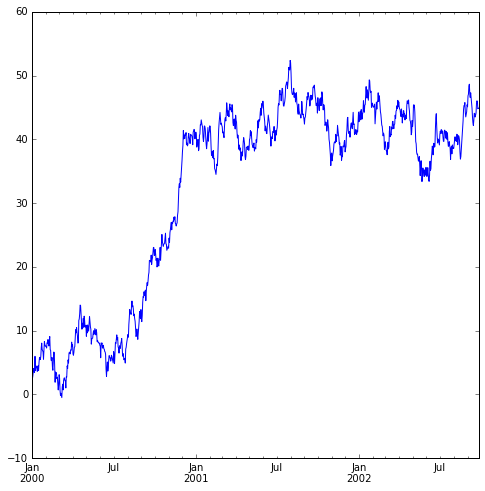

In [89]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

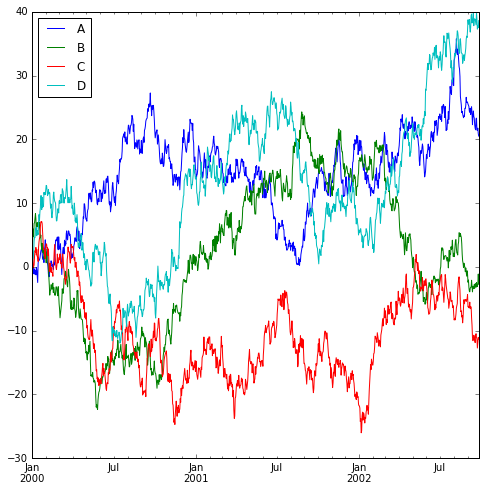

In [90]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## Further reading
* Pandas docs: http://pandas.pydata.org/pandas-docs/stable/
* https://bitbucket.org/hrojas/learn-pandas
* Python for Data Analysis (O'Reilly)                     